# NLP_Lyrics_Clustering

Purpose of this project is to cluseter songs by some variables and try to come up with somekind of a relationship between them. There are 3 parts

### Parts : 
1. **Info** : Display info about data
2. **Feature Extraction** : by using tokenizer, stemmer, deleting stop words, tfidf method and LDA, we will create vectors to feed to the clustering algorithm
3. **Clustering** : By using k-means, we will try to cluster data

## Info
All credit should go to [Carrie](https://www.kaggle.com/carrie1/drug-of-choice-by-genre-using-song-lyrics) for this section. Thanks alot.

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("./data_set/lyrics.csv")
df.head()

,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362237 entries, 0 to 362236
Data columns (total 6 columns):
index     362237 non-null int64
song      362235 non-null object
year      362237 non-null int64
artist    362237 non-null object
genre     362237 non-null object
lyrics    266557 non-null object
dtypes: int64(2), object(4)
memory usage: 16.6+ MB


In [3]:
df = df.replace({'\n' : ' '}, regex = True)
df.head()

,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing? You know I'm gonna cut..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy, it's like you seem..."
2,2,honesty,2009,beyonce-knowles,Pop,If you search For tenderness It isn't hard to ...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I [Verse 1:] If I wrote a..."
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


### Lowercasing and deleting gibberish
1. Lower case
2. everything except a-z

In [4]:
# Lowercase
df["lyrics"] = df["lyrics"].str.lower()
df.head()

,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"oh baby, how you doing? you know i'm gonna cut..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy, it's like you seem..."
2,2,honesty,2009,beyonce-knowles,Pop,if you search for tenderness it isn't hard to ...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"oh oh oh i, oh oh oh i [verse 1:] if i wrote a..."
4,4,black-culture,2009,beyonce-knowles,Pop,"party the people, the people the party it's po..."


In [5]:
import re
def regex(data):
    return re.sub("[^a-z]"," ", data)

In [6]:
df["lyrics"] = [ regex(str(x)) for x in df["lyrics"] ]
df.head()
# df.head()

,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,oh baby how you doing you know i m gonna cut...
1,1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy it s like you seem...
2,2,honesty,2009,beyonce-knowles,Pop,if you search for tenderness it isn t hard to ...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,oh oh oh i oh oh oh i verse if i wrote a...
4,4,black-culture,2009,beyonce-knowles,Pop,party the people the people the party it s po...


In [7]:
#count the words in each song
df['word_count'] = df['lyrics'].str.split().str.len()
df.head()

,index,song,year,artist,genre,lyrics,word_count
0,0,ego-remix,2009,beyonce-knowles,Pop,oh baby how you doing you know i m gonna cut...,472
1,1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy it s like you seem...,268
2,2,honesty,2009,beyonce-knowles,Pop,if you search for tenderness it isn t hard to ...,177
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,oh oh oh i oh oh oh i verse if i wrote a...,539
4,4,black-culture,2009,beyonce-knowles,Pop,party the people the people the party it s po...,338


In [8]:
#check the word counts by genre
df['word_count'].groupby(df['genre']).describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Country,17286.0,163.681534,108.386174,1.0,105.0,161.0,228.0,1401.0
Electronic,16205.0,100.245295,143.547611,0.0,1.0,1.0,176.0,2035.0
Folk,3241.0,130.568035,136.000664,0.0,1.0,121.0,212.0,2404.0
Hip-Hop,33965.0,375.996349,312.389081,0.0,1.0,400.0,597.0,8441.0
Indie,5732.0,114.475227,134.124648,0.0,1.0,85.5,203.0,1294.0
Jazz,17147.0,85.132443,114.567091,1.0,1.0,1.0,153.0,1113.0
Metal,28408.0,145.867397,125.006721,0.0,58.0,134.0,208.0,2431.0
Not Available,29814.0,176.227242,153.438671,0.0,32.0,165.0,256.0,2582.0
Other,23683.0,52.583414,119.628986,0.0,1.0,1.0,1.0,1685.0


In [9]:
#let's see what the songs with 1 word look like
df1 = df.loc[df['word_count'] == 1]
df1.head()

,index,song,year,artist,genre,lyrics,word_count
158,158,lemonade,2016,beyonce-knowles,Pop,nan,1
305,305,no-more-tears,2002,eazy-e,Hip-Hop,nan,1
311,311,still-f-kem,2002,eazy-e,Hip-Hop,nan,1
320,320,rev-skit,2002,eazy-e,Hip-Hop,nan,1
338,338,hush-hush,2013,asher-monroe,Pop,nan,1


In [10]:
#elimintate the 1-word songs and review the data again
df = df[df['word_count'] > 2]
df['word_count'].groupby(df['genre']).describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Country,14322.0,197.349183,86.993474,3.0,136.0,181.0,244.0,1401.0
Electronic,7580.0,213.172296,141.748458,3.0,115.0,187.0,278.0,2035.0
Folk,2095.0,201.448687,120.014123,4.0,126.0,183.0,254.5,2404.0
Hip-Hop,24759.0,515.429016,249.284065,3.0,357.0,509.0,660.0,8441.0
Indie,3101.0,210.752015,114.264673,12.0,135.0,194.0,261.0,1294.0
Jazz,7824.0,185.383563,101.395129,3.0,116.0,163.0,229.0,1113.0
Metal,22897.0,180.733153,114.548848,3.0,108.0,160.0,228.0,2431.0
Not Available,22779.0,230.365512,135.620880,3.0,141.0,204.0,289.0,2582.0
Other,5168.0,237.390093,147.977090,3.0,134.0,204.0,303.0,1685.0


In [11]:
#There are still some outliers on the low end. Reviewing songs with less than 100 words.
df100 = df.loc[df['word_count'] <= 100]
df100.head()

,index,song,year,artist,genre,lyrics,word_count
43,43,diamonds,2007,beyonce-knowles,Pop,square cut or pear shaped these rocks don t l...,31
78,78,god-made-you-beautiful,2013,beyonce-knowles,Pop,when you were born the angels sighed in deligh...,87
83,83,i-m-glad-there-s-you,2010,beyonce-knowles,Pop,in this world of ordinary people exraordinary ...,98
85,85,freakdum-dresses,2010,beyonce-knowles,Pop,it s about getting our freakdum drsses on,8
89,89,helo,2012,beyonce-knowles,Pop,baby you know i love you baby you know i need ...,38


In [12]:
#let's check on the high end
df1000 = df.loc[df['word_count'] >= 1000]
df1000.head()

,index,song,year,artist,genre,lyrics,word_count
95,95,get-me-bodied,2006,beyonce-knowles,Pop,nine four eight one b day mission one i m ...,1169
113,113,get-me-bodied-extended-remix-bonus-track,2006,beyonce-knowles,Pop,nine four eight one b day mission one ima ...,1042
1590,1590,tour-hip-hop-version,2006,capleton,Electronic,yeah i say straighten yuh crooked ways blessed...,1035
2302,2302,del-s-nightmare,2007,del-the-funky-homosapien,Hip-Hop,let me tell you a little story about the slave...,1010
2339,2339,burnt,2007,del-the-funky-homosapien,Hip-Hop,del mista twista get ya every single time w...,1132


In [13]:
#let's get rid of the outliers on the low and high end using somewhat randomly selected points
del df1, df100, df1000 
df_clean = df[df['word_count'] >= 100]
df_clean = df[df['word_count'] <= 1000]
df_clean['word_count'].groupby(df_clean['genre']).describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Country,14321.0,197.265135,86.413046,3.0,136.00,181.0,244.0,929.0
Electronic,7575.0,212.435248,138.515609,3.0,115.00,187.0,278.0,959.0
Folk,2093.0,199.841376,107.007928,4.0,126.00,183.0,254.0,994.0
Hip-Hop,24124.0,497.435044,214.579169,3.0,352.00,501.0,646.0,1000.0
Indie,3094.0,208.658371,105.440222,12.0,135.00,193.5,260.0,968.0
Jazz,7823.0,185.264988,100.857652,3.0,116.00,163.0,229.0,967.0
Metal,22882.0,179.983480,110.061687,3.0,108.00,160.0,228.0,999.0
Not Available,22751.0,229.124610,130.365265,3.0,141.00,204.0,289.0,982.0
Other,5162.0,236.247966,143.954751,3.0,134.00,204.0,303.0,988.0


In [14]:
# lets get rid of "not available" and "other"
df_clean = df_clean[df_clean["genre"] != "Not Available"]
df_clean = df_clean[df_clean["genre"] != "Other"]
df_clean['word_count'].groupby(df_clean['genre']).describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Country,14321.0,197.265135,86.413046,3.0,136.00,181.0,244.0,929.0
Electronic,7575.0,212.435248,138.515609,3.0,115.00,187.0,278.0,959.0
Folk,2093.0,199.841376,107.007928,4.0,126.00,183.0,254.0,994.0
Hip-Hop,24124.0,497.435044,214.579169,3.0,352.00,501.0,646.0,1000.0
Indie,3094.0,208.658371,105.440222,12.0,135.00,193.5,260.0,968.0
Jazz,7823.0,185.264988,100.857652,3.0,116.00,163.0,229.0,967.0
Metal,22882.0,179.983480,110.061687,3.0,108.00,160.0,228.0,999.0
Pop,40166.0,260.312578,132.504334,3.0,166.00,237.0,330.0,994.0
R&B,3388.0,238.538076,123.750380,5.0,150.75,215.0,298.0,918.0


In [15]:
# save df_clean
import os.path
if not os.path.exists("./data_frame/") :
    os.makedirs("./data_frame/")

df_clean.to_csv("./data_frame/df_clean.csv",sep=";",index=False)

In [16]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232444 entries, 0 to 362236
Data columns (total 7 columns):
index         232444 non-null int64
song          232443 non-null object
year          232444 non-null int64
artist        232444 non-null object
genre         232444 non-null object
lyrics        232444 non-null object
word_count    232444 non-null int64
dtypes: int64(3), object(4)
memory usage: 24.2+ MB


In [17]:
genre = df_clean.groupby(['genre'],as_index=False).count()
genre2 = genre[['genre','song']]
genre2

,genre,song
0,Country,14321
1,Electronic,7575
2,Folk,2093
3,Hip-Hop,24124
4,Indie,3094
5,Jazz,7822
6,Metal,22882
7,Pop,40166
8,R&B,3388
9,Rock,106978


## Feature extraction

I this step, we will try to turn lyrics into vectors so we can feed them to a learning algorithm.

### Steps:
1. Delete stopwords
2. Tokenize
3. Stem
4. Calculate tfidf
5. Decrease dimentions

In [18]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

df_clean.head()


,index,song,year,artist,genre,lyrics,word_count
0,0,ego-remix,2009,beyonce-knowles,Pop,oh baby how you doing you know i m gonna cut...,472
1,1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy it s like you seem...,268
2,2,honesty,2009,beyonce-knowles,Pop,if you search for tenderness it isn t hard to ...,177
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,oh oh oh i oh oh oh i verse if i wrote a...,539
4,4,black-culture,2009,beyonce-knowles,Pop,party the people the people the party it s po...,338


### Tokenize and delete stop words

In [19]:
# Tokenize
df_clean["lyrics"] = [ word_tokenize(lyric) for lyric in df_clean["lyrics"] ]
df_clean["word_count"] = [ len(lyric) for lyric in df_clean["lyrics"] ]
df_clean.head()

,index,song,year,artist,genre,lyrics,word_count
0,0,ego-remix,2009,beyonce-knowles,Pop,"[oh, baby, how, you, doing, you, know, i, m, g...",474
1,1,then-tell-me,2009,beyonce-knowles,Pop,"[playin, everything, so, easy, it, s, like, yo...",270
2,2,honesty,2009,beyonce-knowles,Pop,"[if, you, search, for, tenderness, it, isn, t,...",177
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"[oh, oh, oh, i, oh, oh, oh, i, verse, if, i, w...",551
4,4,black-culture,2009,beyonce-knowles,Pop,"[party, the, people, the, people, the, party, ...",338


In [20]:
def remove_stop_words(text,stopwords):
    cleaned_text = []
    for word in text:
        if word not in stopwords:
            cleaned_text.append(word)
    return cleaned_text

In [21]:
# Delete stop words
stopWords = set(stopwords.words('english'))

df_clean["lyrics"] = [ remove_stop_words(text,stopWords) for text in df_clean["lyrics"]]
df_clean["word_count"] = [ len(lyric) for lyric in df_clean["lyrics"] ]
df_clean.head()

del stopWords

In [22]:
# Stem
def stem(wordsFiltered, st = PorterStemmer()):

    stemed = []
    for i in range(len(wordsFiltered)):
        stemed.append(st.stem(wordsFiltered[i]))

    return stemed

In [23]:
df_clean["lyrics"] = [ stem(text,st = PorterStemmer()) for text in df_clean["lyrics"]]
df_clean["lyrics"][:5]

0    [oh, babi, know, gon, na, cut, right, chase, w...
1    [playin, everyth, easi, like, seem, sure, stil...
2    [search, tender, hard, find, love, need, live,...
3    [oh, oh, oh, oh, oh, oh, vers, wrote, book, st...
4    [parti, peopl, peopl, parti, pop, sit, around,...
Name: lyrics, dtype: object

In [24]:
# tokenizing and stemming takes too much time!!! 
df_clean.to_csv("./data_frame/df_clean_stemmed.csv",sep=";",index=False)

## tfidf

>In information retrieval, tf–idf or TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling. [wikipedia](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)

### Term frequency
>In the case of the term frequency tf(t,d), the simplest choice is to use the raw count of a term in a document, i.e. the number of times that term t occurs in document d. If we denote the raw count by ft,d, then the simplest tf scheme is tf(t,d) = ft,d.

### Inverse document frequency
>The inverse document frequency is a measure of how much information the word provides, that is, whether the term is common or rare across all documents. It is the logarithmically scaled inverse fraction of the documents that contain the word, obtained by dividing the total number of documents by the number of documents containing the term, and then taking the logarithm of that quotient.


In [25]:
# Term frequency : count / number of words in bow
def computeTF(wordDict, bow):
    tfDict = {}
    bowCount = len(bow)
    # print(wordDict)
    for word, count in wordDict.items():
        tfDict[word] = count / float(bowCount)
    return tfDict

In [26]:
# Inverse document frequency : 
# log( total_number_of_documents_in_the_corpus / total_count_of_word )
def computeIDF(docList):
    import math
    N = len(docList)
    #divide N by denominator above, take the log of that
    for word, val in docList.items():
        docList[word]= math.log(N / float(val)) 

    return docList

In [27]:
# Term frequency–Inverse document frequency : tf * idf
def computeTFIDF(tfBow, idfs):
    tfidf = {}
    for word, val in tfBow.items():
        tfidf[word] = val * idfs[word]
    return tfidf

In [28]:
# create a feature dict
def create_feature_dict(df):
    feature_dict = {}
    count_words = 0
    for lyrics in df["lyrics"]:
        for word in lyrics:
            if word not in feature_dict.keys():
                feature_dict[word] = 1
            else:
                feature_dict[word] += 1
            count_words += 1

    return feature_dict

In [29]:
feature_dict = create_feature_dict(df_clean)

len(feature_dict)
# THIS IS RIDICULOUS

294048

In [30]:
# calculates tfidf for all examples, creates X and Y to feed to any learning algortihm
def create_vector(data, feature_vector, class_list):

    def find_cls_index(y):
        for i,c in enumerate(class_list):
            if c == y:
                return i
        print("ERROR. This class does not exist in the list!")
        quit()


    vectors = []
    classes = []
    for text,c in data:
        if(len(text) == 0):
            raise AttributeError("text is empty")

        # create y

        c = find_cls_index(c)
        classes.append(c)

        # create vectors to feed tfidf
        vector = dict.fromkeys(feature_vector,0)
        for w in text:
            if w in feature_vector:
                vector[w] += 1
        vectors.append(vector)



    tfidfs = []

    # calculate tfidfs 
    idfs = computeIDF(feature_vector)

    for i in range(0,len(data)):
        tf = computeTF(vectors[i],data[i][0])
        tfidf = computeTFIDF(tf,idfs)
        tfidfs.append(np.array(list(tfidf.values())))

    # X and Y // numpy arrays
    return np.array(tfidfs), np.array(classes)


In [31]:
# We will start with createing a class_list
# For this run we chose genres
class_list = []

for g in genre2["genre"]:
    class_list.append(g)
    
class_list

['Country',
 'Electronic',
 'Folk',
 'Hip-Hop',
 'Indie',
 'Jazz',
 'Metal',
 'Pop',
 'R&B',
 'Rock']

In [32]:
# lets make some cleaning before start
del genre, genre2, df

### Preparing data

Size of the feature vector is ridiculous if it is prepared for the entire data set. We may create a smaller, simpler sub set to use in clustering

#### Options we can do to small the size :
1. Creating feature dictionary for a smaller data set
2. Dimentionality reduction by LDA or PCA


For this example we create a sub set with year 2009's songs.


In [33]:
df_clean = df_clean[df_clean["year"] == 2009]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8723 entries, 0 to 361981
Data columns (total 7 columns):
index         8723 non-null int64
song          8722 non-null object
year          8723 non-null int64
artist        8723 non-null object
genre         8723 non-null object
lyrics        8723 non-null object
word_count    8723 non-null int64
dtypes: int64(3), object(4)
memory usage: 545.2+ KB


In [34]:
df_clean['word_count'].groupby(df_clean['genre']).describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Country,327.0,99.373089,34.753756,8.0,71.0,99.0,122.0,214.0
Electronic,283.0,117.342756,79.167158,5.0,63.5,103.0,147.0,516.0
Folk,72.0,119.138889,66.932866,11.0,77.0,111.5,135.5,375.0
Hip-Hop,1253.0,244.486832,112.903550,4.0,169.0,235.0,316.0,684.0
Indie,131.0,98.877863,49.945050,8.0,60.0,98.0,128.0,236.0
Jazz,338.0,123.482249,71.353976,4.0,67.0,110.0,169.0,404.0
Metal,489.0,102.286299,52.251597,12.0,70.0,93.0,124.0,392.0
Pop,2041.0,136.308672,71.213926,3.0,85.0,124.0,172.0,497.0
R&B,69.0,126.768116,58.804548,42.0,85.0,110.0,156.0,330.0


In [35]:
# Total count
len(df_clean)

8723

In [36]:
feature_dict = create_feature_dict(df_clean)
len(feature_dict.values())

39622

### Deleting singletons and short head

Long tail and short head need to be deleted to create a smaller feature dictionary.
This step also helps in generalization. In fisrt implementation a very short head and only singletons are deleted but when we delete words occured less than 3 times and delete a slitly longer head(from .01 to .1), we got better results.

In [37]:
# delete singletons

keys = list(feature_dict.keys())
 
for k in keys:
    if feature_dict[k] < 3:
        feature_dict.pop(k)
del keys

len(feature_dict)

15928

In [38]:

keys = list(feature_dict.keys())
# sort by values of dict!!
s = [ (k, feature_dict[k]) for k in sorted(feature_dict, key=feature_dict.get, reverse=True)]

# first 0.01% is the short head
# we need to delete short head
# singletons are already deleted, so we can assume that long
# tail is deleted
short_head_index = int(len(s) * .1)
short_head_threshold = s[short_head_index][1]

print("short head threshold : ", short_head_threshold)

keys = list(feature_dict.keys())

for i in keys:
    # long tail
    if feature_dict[i] > short_head_threshold:
        feature_dict.pop(i)
        
del keys

short head threshold :  86


In [39]:
# feature length
len(feature_dict)

14343

In [40]:
# create tfidf for every single row
class_list = list(df_clean.genre.unique())

class_list

['Pop',
 'Hip-Hop',
 'Rock',
 'Country',
 'Electronic',
 'Metal',
 'Jazz',
 'Indie',
 'Folk',
 'R&B']

We may try to create a small sample for testing.

We will try to cluster <b>Jazz</b> and <b>Metal</b> songs that are published in <b>2009</b>.

In [41]:
# combine 2 data frames with genres Metal and Jazz
data = df_clean[df_clean["genre"] == "Jazz"][:300]
data = data.append(df_clean[df_clean["genre"] == "Metal"][:300])
# data

In [42]:
len(data)

600

In [43]:
# lets create class_list in this case it consist of Metal and Jazz
class_list = list(data.genre.unique())

class_list

['Jazz', 'Metal']

In [44]:
data = data[["lyrics","genre"]]
data = data.values.tolist()

In [45]:
# create vectors and corresponding classes
tfidf_X,Y = create_vector(data,feature_dict,class_list)

if not os.path.exists("./tfidf/") :
    os.makedirs("./tfidf/")

np.save("./tfidf/tfidf_X",tfidf_X)
np.save("./tfidf/tfidf_Y",Y)

# Dimentionality reduction
We used 2 popular dimetionality reduction algorithms in this program; LDA and PCA. LDA has given great results with data set but because of its supervised componenets, it violates unsupervised nature of code. To create a pure unsupervised learning, we also implemented PCA but results were not good as LDA. It is up to user to choose which one to use. To use one simply delete or comment other one.

## LDA

Linear Discriminant Analysis (LDA) is most commonly used as dimensionality reduction technique in the pre-processing step for pattern-classification and machine learning applications. The goal is to project a dataset onto a lower-dimensional space with good class-separability in order avoid overfitting (“curse of dimensionality”) and also reduce computational costs.

For more information [Source](https://sebastianraschka.com/Articles/2014_python_lda.html)

In this project, we used sklearn's "Linear Discriminant Analysis". We reduced number of features to 200.

One problem of LDA is its **"supervised"** property. In this project, we only used it to decrease dimensions. For a full **"unsupervised"** approach, **PCA** can be used.

In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [47]:
# reduce number of features into 200
lda = LDA(n_components=200)


In [48]:
# run an LDA and use it to transform the features
X = lda.fit(tfidf_X, Y).transform(tfidf_X)

/home/huseyin/tensorflow/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


## PCA

Principle Component Analysis (PCA) one of the most important algorithms in the field of Data Science and is by far the most popular dimensionality reduction method currently used today. The objective of Principle Component Analysis is simple, identify a hyperplane that lies closest to the data points, and project the data onto it.

For more information [Source](https://hackernoon.com/supervised-machine-learning-dimensional-reduction-and-principal-component-analysis-614dec1f6b4c)

In [49]:
# from sklearn.decomposition import PCA

In [50]:
# reduce number of features into 200
# pca = PCA(n_components=200)


In [51]:
# run an LDA and use it to transform the features
# X = pca.fit(tfidf_X).transform(tfidf_X)

# Clustering

We used k-means to cluster given data.

**k-means** clustering is a method of vector quantization, originally from signal processing, that is popular for cluster analysis in data mining. k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells. [Source](https://en.wikipedia.org/wiki/K-means_clustering)


In [52]:
# Finally clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=1, init = "random",max_iter = 10000).fit(X)
labels = kmeans.labels_

kmeans.inertia_

78.72715040776927

In [53]:

cluster1 = []
cluster2 = []

for i in range(len(Y)):
    if labels[i] == 1:
        cluster1.append(Y[i])
    else:
        cluster2.append(Y[i])


In [54]:
print("----cluster1----")
print("zeros : ",cluster1.count(0))
print("ones  : ",cluster1.count(1))
print("----cluster2----")
print("zeros : ",cluster2.count(0))
print("ones  : ",cluster2.count(1))


----cluster1----
zeros :  292
ones  :  2
----cluster2----
zeros :  8
ones  :  298


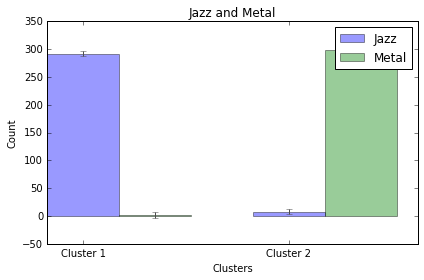

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


n_groups = 2

means_men = (cluster1.count(0), cluster2.count(0))

means_women = (cluster1.count(1),cluster2.count(1) )

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, means_men, bar_width,
                alpha=opacity, color='b',
                yerr=5, error_kw=error_config,
                label='Jazz')

rects2 = ax.bar(index + bar_width, means_women, bar_width,
                alpha=opacity, color='g',
                yerr=5, error_kw=error_config,
                label='Metal')

ax.set_xlabel('Clusters')
ax.set_ylabel('Count')
ax.set_title('Jazz and Metal')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Cluster 1', 'Cluster 2'))
ax.legend()

fig.tight_layout()
plt.show()

This result is not very satisfying. This document might be improved and test might be made with different parameters.